In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
from fastai import *
from fastai.text import *

import pandas as pd

In [20]:
import fastai.utils.collect_env

fastai.utils.collect_env.show_install()



```text
=== Software === 
python        : 3.6.5
fastai        : 1.0.52
fastprogress  : 0.1.21
torch         : 1.1.0
nvidia driver : 418.40
torch cuda    : 10.0.130 / is available
torch cudnn   : 7501 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.4.0-1084-aws-x86_64-with-debian-stretch-sid
distro        : #94-Ubuntu SMP Fri May 17 13:10:20 UTC 2019
conda env     : Unknown
python        : /home/ubuntu/anaconda3/bin/python
sys.path      : 
/home/ubuntu/src/cntk/bindings/python
/home/ubuntu/anaconda3/lib/python36.zip
/home/ubuntu/anaconda3/lib/python3.6
/home/ubuntu/anaconda3/lib/python3.6/lib-dynload
/home/ubuntu/anaconda3/lib/python3.6/site-packages
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/extensions
/home/ubuntu/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Opt

In [21]:
bs=36

## Preparing the data (on a sample)

In [22]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/cl_nltk_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/README'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/unsup'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/lm_nltk_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/lm_sklearn_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/lm_spacy_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/test'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/cl_sklearn_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/lm_full_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/cl_full_databunch'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/models'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/cl_spacy_databunch')]

In [7]:
(path/'train').ls()

[PosixPath('/home/ubuntu/.fastai/data/imdb/train/pos'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/neg'),
 PosixPath('/home/ubuntu/.fastai/data/imdb/train/labeledBow.feat')]

### Creating custom tokenizer for removing stop words

In [23]:
def remove_stop_words_nltk(text:Collection[str]):
    from nltk.corpus import stopwords 
    stop_words_nltk = stopwords.words('english')
    text_filt = []
    for word in text:
        if word not in stop_words_nltk:
            text_filt.append(word)
    return text_filt


def remove_stop_words_spacy(text:Collection[str]):
#     import spacy
#     nlp = spacy.load("en_core_web_sm")
    stop_words_spacy = {'however', 'our', 'onto', 'the', 'is', 'so', 'us', 'upon', 'while', 'as', 'why', 'below', 'only', 'herself', 'already', 'fifteen', 'under', 'whole', 'few', 'empty', 'used', 'many', 'top', 'seeming', 'to', 'there', 'alone', 'or', 'therein', 'thru', 'enough', 'never', 'ca', 'an', 'but', 'do', 'other', 'everywhere', 'rather', 'than', 'anything', 'once', 'less', 'nowhere', 'more', 'back', 'within', 'cannot', 'into', 'did', 'hence', 'last', 'itself', 'behind', 'elsewhere', 'seems', 'toward', 'indeed', 'it', 'thus', 'well', 'much', 'whereafter', 'whether', 'which', 'between', 'beside', 'always', 'please', 'nine', 'seemed', 'could', 'sometime', 'another', 'ourselves', 'against', 'wherein', 'eight', 'been', 'again', 'and', 'ours', 'themselves', 'two', 'across', 'either', 'neither', 'often', 'perhaps', 'out', 'by', 'nobody', 'others', 'those', 'whenever', 'mine', 'former', 'eleven', 'any', 'anyhow', 'call', 'myself', 'of', 're', 'same', 'their', 'third', 'anyway', 'along', 'hereupon', 'hereby', 'meanwhile', 'my', 'one', 'per', 'yourselves', 'using', 'were', 'whatever', 'somehow', 'except', 'whereupon', 'down', 'five', 'should', 'although', 'whereby', 'i', 'give', 'among', 'almost', 'doing', 'go', 'around', 'something', 'every', 'full', 'keep', 'might', 'must', 'whither', 'hers', 'besides', 'because', 'done', 'if', 'since', 'most', 'a', 'various', 'whose', 'your', 'his', 'beyond', 'ever', 'would', 'make', 'hundred', 'whereas', 'move', 'regarding', 'at', 'can', 'without', 'had', 'wherever', 'are', 'her', 'still', 'be', 'no', 'name', 'through', 'what', 'put', 'himself', 'thereupon', 'these', 'above', 'before', 'anywhere', 'whoever', 'this', 'them', 'someone', 'me', 'latter', 'over', 'from', 'until', 'whence', 'then', 'in', 'thereafter', 'unless', 'six', 'herein', 'during', 'somewhere', 'due', 'seem', 'with', 'has', 'sixty', 'further', 'such', 'that', 'namely', 'none', 'also', 'who', 'four', 'we', 'all', 'very', 'he', 'being', 'may', 'nevertheless', 'fifty', 'whom', 'some', 'about', 'serious', 'will', 'else', 'therefore', 'twenty', 'you', 'yours', 'where', 'next', 'she', 'take', 'becomes', 'amount', 'least', 'even', 'was', 'for', 'have', 'nor', 'really', 'when', 'otherwise', 'afterwards', 'am', 'how', 'after', 'its', 'throughout', 'now', 'everyone', 'bottom', 'together', 'moreover', 'becoming', 'mostly', 'quite', 'forty', 'see', 'hereafter', 'thereby', 'too', 'here', 'first', 'yourself', 'each', 'everything', 'up', 'via', 'part', 'say', 'they', 'both', 'noone', 'own', 'though', 'him', 'amongst', 'became', 'become', 'beforehand', 'front', 'latterly', 'thence', 'made', 'yet', 'sometimes', 'anyone', 'get', 'towards', 'nothing', 'on', 'does', 'formerly', 'show', 'ten', 'three', 'several', 'just', 'side', 'not', 'off', 'twelve'}
    text_filt = []
    for word in text:
        if word not in stop_words_spacy:
            text_filt.append(word)
    return text_filt


def remove_stop_words_sklearn(text:Collection[str]):
    from sklearn.feature_extraction import stop_words
    stop_words_sklearn = stop_words.ENGLISH_STOP_WORDS
    text_filt = []
    for word in text:
        if word not in stop_words_sklearn:
            text_filt.append(word)
    return text_filt

In [8]:
custom_rules_nltk = [remove_stop_words_nltk] + defaults.text_post_rules
custom_rules_spacy = [remove_stop_words_spacy] + defaults.text_post_rules
custom_rules_sklearn = [remove_stop_words_sklearn] + defaults.text_post_rules


In [9]:
tokenizer_nltk = Tokenizer(post_rules=custom_rules_nltk)
tokenizer_spacy = Tokenizer(post_rules=custom_rules_spacy)
tokenizer_sklearn = Tokenizer(post_rules=custom_rules_sklearn)

### Creating databunch for language models

In [81]:
data_lm_nltk = (TextList.from_folder(path, 
                                     processor=[OpenFileProcessor(), 
                                                TokenizeProcessor(tokenizer=tokenizer_nltk), 
                                                NumericalizeProcessor()])
                .use_partial_data(0.2, seed=42)
               #Inputs: all the text files in path
                .filter_by_folder(include=['train', 'test', 'unsup']) 
               #We may have other temp folders that contain text files so we only keep what's in train and test
                .split_by_rand_pct(0.1, seed=42)
               #We randomly split and keep 10% (10,000 reviews) for validation
                .label_for_lm()           
               #We want to do a language model so we label accordingly
                .databunch(bs=bs, num_workers=1))
data_lm_nltk.save('lm_nltk_databunch')

In [12]:
data_lm_sklearn = (TextList.from_folder(path, 
                                     processor=[OpenFileProcessor(), 
                                                TokenizeProcessor(tokenizer=tokenizer_sklearn), 
                                                NumericalizeProcessor()])
                .use_partial_data(0.2, seed=42)
                .filter_by_folder(include=['train', 'test', 'unsup']) 
                .split_by_rand_pct(0.1, seed=42)
                .label_for_lm()           
                .databunch(bs=bs, num_workers=-1))

data_lm_sklearn.save('lm_sklearn_databunch')

In [16]:
data_lm_spacy = (TextList.from_folder(path, 
                                     processor=[OpenFileProcessor(), 
                                                TokenizeProcessor(tokenizer=tokenizer_spacy), 
                                                NumericalizeProcessor()])
                .use_partial_data(0.2, seed=42)
                .filter_by_folder(include=['train', 'test', 'unsup']) 
                .split_by_rand_pct(0.1, seed=42)
                .label_for_lm()           
                .databunch(bs=bs, num_workers=1))


data_lm_spacy.save('lm_spacy_databunch')


In [17]:
data_lm_full = (TextList.from_folder(path)
                .use_partial_data(0.2, seed=42)
                .filter_by_folder(include=['train', 'test', 'unsup']) 
                .split_by_rand_pct(0.1, seed=42)
                .label_for_lm()           
                .databunch(bs=bs, num_workers=-1))

data_lm_full.save('lm_full_databunch')

### Creating databunches for classifier models

In [83]:
data_cl_nltk = (TextList.from_folder(path, vocab=data_lm_nltk.vocab, 
                                     processor=[OpenFileProcessor(), 
                                                TokenizeProcessor(tokenizer=tokenizer_nltk), 
                                                NumericalizeProcessor()])
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs, num_workers=1))

data_cl_nltk.save('cl_nltk_databunch')

In [87]:
data_cl_spacy = (TextList.from_folder(path, vocab=data_lm_spacy.vocab)
             .split_by_folder(valid='test')
             .label_from_folder(classes=['neg', 'pos'])
             .databunch(bs=bs, num_workers=1))

data_cl_spacy.save('cl_spacy_databunch')

In [88]:
data_cl_sklearn = (TextList.from_folder(path, vocab=data_lm_sklearn.vocab)
             .split_by_folder(valid='test')
             .label_from_folder(classes=['neg', 'pos'])
             .databunch(bs=bs, num_workers=1))

data_cl_sklearn.save('cl_sklearn_databunch')

In [ ]:
data_cl_full = (TextList.from_folder(path, vocab=data_lm_full.vocab)
             .split_by_folder(valid='test')
             .label_from_folder(classes=['neg', 'pos'])
             .databunch(bs=bs, num_workers=1))

data_cl_full.save('cl_full_databunch')

## Load databunches

In [10]:
data_lm_nltk = load_data(path, 'lm_nltk_databunch')
data_lm_spacy = load_data(path, 'lm_spacy_databunch')
data_lm_sklearn = load_data(path, 'lm_sklearn_databunch')
data_lm_full = load_data(path, 'lm_full_databunch')

In [25]:
data_cl_nltk = load_data(path, 'cl_nltk_databunch')
data_cl_spacy = load_data(path, 'cl_spacy_databunch')
data_cl_sklearn = load_data(path, 'cl_sklearn_databunch')
data_cl_full = load_data(path, 'cl_full_databunch')

In [25]:
data_lm_nltk.show_batch()

idx,text
0,"xxmaj german - speaking countries ) , xxmaj xxunk seen traditional backward region . xxmaj and actors helpless alien women . xxmaj well , films people unable deal women like "" xxmaj american xxmaj pie "" series . \n \n xxmaj but film achieved true , funny weirdness . xxmaj you constantly wonder came crackpot ideas . xxmaj but 1974 , looking back 35 years fills one kind nostalgia"
1,"action , without toning gory moments children , made amazing ! xxmaj this sad day movie genres . xxmaj originality dead . xxmaj people hail horror movies like xxmaj the xxmaj descent xxmaj the xxmaj mist , ignoring fact 95 % movies could copy / pasted last monster movie held run . xxmaj the fact movie takes clichés actually laughs face , i ca n't help enjoy . xxmaj people"
2,"self . xxmaj contrastingly , xxmaj giamatti gives us younger , xxunk mope . xxmaj the comics give us varied pictures -- depends cartoonist . \n \n xxmaj pekar , played xxmaj giamatti , lackluster protagonist ; 's obsessive - compulsive neurotic whines virtues everyman . xxmaj he 's repulsive -- home mess scratches head incessantly . xxmaj he try new shampoo conditioner , perhaps n't wash often ."
3,"ending luscious . xxmaj check one form opinion . i give picture 7 10 . xxbos xxmaj loosely based upon life xxmaj janis xxmaj joplin struggles fame drugs , xxmaj rose stays viewer long final fadeout . xxmaj acting tour - de - forces manifest everywhere , although virtually entire supporting cast brings xxmaj broadway - style truth urgency make thus excellent . xxbos xxmaj what say film makes """
4,"3 lousy writing , poor technical merit continuity problems . xxmaj some people given movie 10 - -and perhaps okay simply scoring fun factor . xxmaj however , technically inept movie serial start finish -- produced 3rd - rate writers , actors crew . xxmaj that really true nearly serials meant low - brow entertainment particularly aimed kids . xxmaj and 's nothing wrong , "" high art "" ai"


### Training the model

In [27]:
learn_lm_nltk = language_model_learner(data_lm_nltk, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_lm_spacy = language_model_learner(data_lm_spacy, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_lm_sklearn = language_model_learner(data_lm_sklearn, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_lm_full = language_model_learner(data_lm_full, AWD_LSTM, drop_mult=0.3).to_fp16()

In [28]:
lr = 1e-3
lr *= bs/48

In [29]:
learn_lm_nltk.fit_one_cycle(1, lr*10, moms=(0.8,0.7))
learn_lm_nltk.save('fit_1_nltk')

epoch,train_loss,valid_loss,accuracy,time
0,5.378191,5.245024,0.234844,10:57


In [30]:
learn_lm_spacy.fit_one_cycle(1, lr*10, moms=(0.8,0.7))
learn_lm_spacy.save('fit_1_spacy')

epoch,train_loss,valid_loss,accuracy,time
0,5.381940,5.227905,0.244304,10:14


In [31]:
learn_lm_sklearn.fit_one_cycle(1, lr*10, moms=(0.8,0.7))
learn_lm_sklearn.save('fit_1_sklearn')

epoch,train_loss,valid_loss,accuracy,time
0,5.389753,5.214949,0.244041,10:20


In [32]:
learn_lm_full.fit_one_cycle(1, lr*10, moms=(0.8,0.7))
learn_lm_full.save('fit_1_full')

epoch,train_loss,valid_loss,accuracy,time
0,4.207071,4.026411,0.290705,16:30


In [33]:
learn_lm_nltk.load('fit_1_nltk')
learn_lm_spacy.load('fit_1_spacy')
learn_lm_sklearn.load('fit_1_sklearn')
learn_lm_full.load('fit_1_full')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (18000 items)
x: LMTextList
xxbos xxmaj why do i give this 1974 porn movie 7 points ? xxmaj because i watched it . xxmaj and i found it hilarious ! xxmaj aliens , their weird spaceship , their weird helmets ... my xxmaj god , was that a sight . xxmaj and all what these desperate alien women need is semen from the earth . 
 
  xxmaj and where do they look for it ? xxmaj in upper xxmaj xxunk , xxmaj germany . xxmaj and that is where the main fun comes from : xxmaj in xxmaj europe ( and more so in xxmaj german - speaking countries ) , xxmaj xxunk is seen as a traditional and backward region . xxmaj and then the actors are so helpless with the alien women . xxmaj well , there have been films about people being unable to deal with women like the " xxmaj american xxmaj pie " series . 
 
  xxmaj but what this film achieved is a true , funny weirdness . xxmaj you constantly wonder how they came up with these crackpot ideas . xxmaj but it 

To complete the fine-tuning, we can then unfreeze and launch a new training.

In [34]:
learn_lm_nltk.unfreeze()

learn_lm_nltk.fit_one_cycle(5, lr, moms=(0.8,0.7))

learn_lm_nltk.save('fine_tuned_nltk')

epoch,train_loss,valid_loss,accuracy,time
0,5.067201,5.103529,0.245249,12:54
1,4.968618,5.008870,0.250998,12:55
2,4.838385,4.955785,0.255924,12:56
3,4.696393,4.938035,0.257160,12:56
4,4.640994,4.938385,0.257317,12:56


In [35]:
learn_lm_spacy.unfreeze()

learn_lm_spacy.fit_one_cycle(5, lr, moms=(0.8,0.7))

learn_lm_spacy.save('fine_tuned_spacy')

epoch,train_loss,valid_loss,accuracy,time
0,5.043610,5.085727,0.254575,12:01
1,4.928919,4.997142,0.260042,12:01
2,4.804254,4.944851,0.263992,12:03
3,4.688810,4.928445,0.265249,12:04
4,4.620386,4.929239,0.265123,12:05


In [36]:
learn_lm_sklearn.unfreeze()

learn_lm_sklearn.fit_one_cycle(5, lr, moms=(0.8,0.7))

learn_lm_sklearn.save('fine_tuned_sklearn')

epoch,train_loss,valid_loss,accuracy,time
0,5.022640,5.075490,0.253841,12:09
1,4.932579,4.983237,0.260333,12:09
2,4.797781,4.935812,0.263406,12:09
3,4.664725,4.918611,0.265124,12:09
4,4.602065,4.919520,0.265347,12:09


In [37]:
learn_lm_full.unfreeze()

learn_lm_full.fit_one_cycle(5, lr, moms=(0.8,0.7))

learn_lm_full.save('fine_tuned_full')

epoch,train_loss,valid_loss,accuracy,time
0,3.931436,3.936269,0.300083,19:21
1,3.867537,3.866182,0.307320,19:24
2,3.757106,3.826124,0.311961,19:24
3,3.633934,3.807157,0.314501,19:25
4,3.571203,3.805984,0.314833,19:25


In [38]:
learn_lm_nltk.save_encoder('fine_tuned_enc_nltk')
learn_lm_spacy.save_encoder('fine_tuned_enc_spacy')
learn_lm_sklearn.save_encoder('fine_tuned_enc_sklearn')
learn_lm_full.save_encoder('fine_tuned_enc_full')

## Classifier

In [26]:
learn_c_nltk = text_classifier_learner(data_cl_nltk, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_c_nltk.load_encoder('fine_tuned_enc_nltk')
learn_c_nltk.freeze()

learn_c_spacy = text_classifier_learner(data_cl_spacy, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_c_spacy.load_encoder('fine_tuned_enc_spacy')
learn_c_spacy.freeze()

learn_c_sklearn = text_classifier_learner(data_cl_sklearn, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_c_sklearn.load_encoder('fine_tuned_enc_sklearn')
learn_c_sklearn.freeze()

learn_c_full = text_classifier_learner(data_cl_full, AWD_LSTM, drop_mult=0.3).to_fp16()
learn_c_full.load_encoder('fine_tuned_enc_full')
learn_c_full.freeze()

### NLTK stop words

In [97]:
learn_c_nltk.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

learn_c_nltk.save('first_nltk')

epoch,train_loss,valid_loss,accuracy,time
0,0.326914,0.260933,0.891440,10:44


In [98]:
learn_c_nltk.freeze_to(-2)
learn_c_nltk.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

learn_c_nltk.save('2nd_nltk')

epoch,train_loss,valid_loss,accuracy,time
0,0.280634,0.226322,0.910080,12:59


In [99]:
learn_c_nltk.freeze_to(-3)
learn_c_nltk.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

learn_c_nltk.save('3rd_nltk')

epoch,train_loss,valid_loss,accuracy,time
0,0.231860,0.190027,0.924680,18:32


In [100]:
learn_c_nltk.unfreeze()
learn_c_nltk.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

learn_c_nltk.save('clas_nltk')

epoch,train_loss,valid_loss,accuracy,time
0,0.191383,0.184940,0.928160,24:37
1,0.173254,0.187098,0.929320,21:15


### spaCy stop words

In [101]:
learn_c_spacy.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

learn_c_spacy.save('first_spacy')

epoch,train_loss,valid_loss,accuracy,time
0,0.347636,0.271195,0.886520,10:58


In [102]:
learn_c_spacy.freeze_to(-2)
learn_c_spacy.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

learn_c_spacy.save('2nd_spacy')

epoch,train_loss,valid_loss,accuracy,time
0,0.287518,0.232540,0.906080,11:22


In [103]:
learn_c_spacy.freeze_to(-3)
learn_c_spacy.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

learn_c_spacy.save('3rd_spacy')

epoch,train_loss,valid_loss,accuracy,time
0,0.245900,0.194601,0.921520,20:38


In [15]:
learn_c_spacy.unfreeze()
learn_c_spacy.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

learn_c_spacy.save('clas_spacy')

epoch,train_loss,valid_loss,accuracy,time
0,0.203296,0.195634,0.923520,26:08
1,0.191713,0.184717,0.926640,21:45


### sklearn stop words

In [16]:
learn_c_sklearn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

learn_c_sklearn.save('first_sklearn')

epoch,train_loss,valid_loss,accuracy,time
0,0.340221,0.269864,0.890080,10:05


In [17]:
learn_c_sklearn.freeze_to(-2)
learn_c_sklearn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

learn_c_sklearn.save('2nd_sklearn')

epoch,train_loss,valid_loss,accuracy,time
0,0.290730,0.228926,0.908760,13:26


In [23]:
learn_c_sklearn.freeze_to(-3)
learn_c_sklearn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

learn_c_sklearn.save('3rd_sklearn')

epoch,train_loss,valid_loss,accuracy,time
0,0.241448,0.193604,0.926040,17:14


In [24]:
learn_c_sklearn.unfreeze()
learn_c_sklearn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

learn_c_sklearn.save('clas_sklearn')

epoch,train_loss,valid_loss,accuracy,time
0,0.197448,0.185936,0.928840,22:48
1,0.189658,0.184257,0.929280,21:23


### No stop words

In [27]:
learn_c_full.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

learn_c_full.save('first_full')

epoch,train_loss,valid_loss,accuracy,time
0,0.318659,0.262543,0.892480,10:43


In [28]:
learn_c_full.freeze_to(-2)
learn_c_full.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

learn_c_full.save('2nd_full')

epoch,train_loss,valid_loss,accuracy,time
0,0.274875,0.219725,0.911960,13:08


In [29]:
learn_c_full.freeze_to(-3)
learn_c_full.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

learn_c_full.save('3rd_full')

epoch,train_loss,valid_loss,accuracy,time
0,0.214808,0.179198,0.930200,20:15


In [31]:
learn_c_full.unfreeze()
learn_c_full.fit_one_cycle(2, slice(1e-3/(2.6**4), 1e-3), moms=(0.8,0.7))

learn_c_full.save('clas_full')

epoch,train_loss,valid_loss,accuracy,time
0,0.173227,0.173576,0.934240,20:54
1,0.156472,0.173468,0.934320,25:33


## Plots

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.7, 1.0)

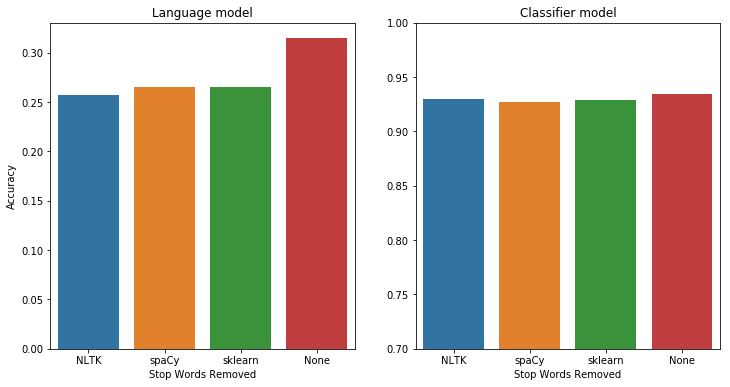

In [32]:
stopwords_types = ['NLTK', 'spaCy', 'sklearn', 'None']
cl_results = [0.929320, 0.926640, 0.929280, 0.934320]
lm_results = [0.257317, 0.265123, 0.265347, 0.314833]

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.barplot(x=stopwords_types, y=lm_results, ax=ax[0])
ax[0].set_title("Language model")
ax[0].set_xlabel("Stop Words Removed")
ax[0].set_ylabel("Accuracy")
sns.barplot(x=stopwords_types, y=cl_results, ax=ax[1])
ax[1].set_title("Classifier model")
ax[1].set_xlabel("Stop Words Removed")
ax[1].set_ylim([0.7, 1.0])
